<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right> 

### Team members

Ahmad Ayaan - 1191302794 

Salah Fayeq y. AlHaismawi - 1201303035

Aisha Sakinah Binti Saadon - 1191101867

Aryssa Amanda Binti Azhar - 1191100575


### The assignment contains following questions


# Installing Libraries

##### Note: Uncomment the code the code to install the relevant libraries

In [ ]:
# pip install ortools
# pip install pulp

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from ortools.sat.python import cp_model
from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Question 1

Year-end school holiday is coming soon. A kindergarten teacher would like to give each
of the student in her class, an amazing holiday set by November 2023. There are 25
students in her class consisting of 15 girls and 10 boys. She has approached you for
help and provided the following details to you:

• Budget for 25 holiday sets = RM 200.00

• Each holiday set must be wrapped using a sheet of paper i.e. blue wrapper for
boy’s holiday set and pink wrapper for girl’s holiday set. Each wrapper cost
RM1.00

• Each holiday set should have at least 2 items being stationery



## Variables Declaration

In [2]:
# Constant variables
budget = 200.00
minimum_stationary_item = 2
wrapper_cost = 1.00

# List of items and their prices
items = [
    ("Chipsmore Biscuit", 2.00),
    ("2B pencil", 1.00),
    ("Color pencil", 3.00),
    ("Magic pen", 3.00),
    ("Potato chip", 2.00),
    ("Milo packet", 1.00),
    ("Mini sketch book", 2.00),
    ("Milk biscuit", 3.00)
]

mutation_rate = 0.1
wrapper_cost = 1 * 25  # Wrapper cost for 25 sets

## Population and Individuals



In [3]:
def individuals():
    return [random.randint(0, 1) for items in range(len(items))]

def generate_population(population_size):
    return [individuals() for x in range(population_size)]

## Fitness Function

The fitness function calculates the total cost of items in a chromosome, after deducting the cost of wrappers and ensuring that atleast 2 of the items are stationery.

In [4]:
def fitness_function(chromosome):
    total = 0
    num_stationery_items = 0
    num_items = 0
    for i, j in enumerate(chromosome):
        if j == 1:
            # to calculate the total cost of the items present in the set
            total += items[i][1]
            num_items += 1
            # to check if the current sets have stationery
            if items[i][0] in ["2B pencil", "Color pencil", "Magic pen", "Mini sketch book"]:
                num_stationery_items += 1

    if num_stationery_items >= 2 and (total*25) + wrapper_cost <=budget:
         # Calculate the fitness score based on the weighted sum of total cost and number of items
        total_score = total * num_items
        items_score = num_items * 10
        score = total_score + items_score
        #print(score)
        return score
    else:
        return 0 if total <= 200 else -1

## Selection Function

In [5]:
"""Perform selection using roulette wheel selection."""
def selection_roulette_wheel(population, fitness_values):
    total_fitness = sum(fitness_values)
    if total_fitness == 0:
        probabilities = [1 / len(population)] * len(population)
    else:
        probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected = random.choices(population, weights=probabilities, k=2)
    return selected[0], selected[1]


"""Perform selection using rank selection."""
def selection_rank(population, fitness_values):
    ranked_population = sorted(zip(population, fitness_values), key=lambda x: x[1], reverse=True)
    selected = []
    while len(selected) < 2:
        for chromosome, fitness in ranked_population:
            if fitness > 0:  # Select only individuals with positive fitness
                selected.append(chromosome.copy())
                if len(selected) == 2:
                    break
    return selected[0], selected[1]


## Crossover Function

In [6]:
"""Perform crossover using single point crossover."""
def crossover_single_point(parent1, parent2):
    single_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:single_point] + parent2[single_point:]
    child2 = parent2[:single_point] + parent1[single_point:]
    return child1, child2

"""Perform crossover using two point crossover."""
def crossover_two_point(parent1, parent2):
    two_point = sorted(random.sample(range(len(parent1)), 2))
    child1 = parent1[:two_point[0]] + parent2[two_point[0]:two_point[1]] + parent1[two_point[1]:]
    child2 = parent2[:two_point[0]] + parent1[two_point[0]:two_point[1]] + parent2[two_point[1]:]
    return child1, child2

## Mutation Function

In [31]:
"""Perform inversion mutation."""
def mutation_inversion(chromosome):
    start = random.randint(0, len(chromosome) - 1)
    end = random.randint(start + 1, len(chromosome))
    mutated_chromosome = chromosome[:start] + chromosome[start:end][::-1] + chromosome[end:]
    return mutated_chromosome

"""Perform bit flipping mutation."""
def mutation_bit_flip(chromosome):
    mutated_chromosome = chromosome[:]
    for i in range(len(mutated_chromosome)):
        if random.random() < 0.1:  # 10% chance for bit flipping
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome

## Main Function

In [38]:
def evolve(population, fitness_values, selection_method, crossover_method, mutation_method):
    next_generation = []
    while len(next_generation) < 25:
        parent1, parent2 = selection_method(population, fitness_values)
        offspring1, offspring2 = crossover_method(parent1, parent2)
        next_generation.extend([offspring1, offspring2])
        #print(next_generation)
    num_mutations = int(0.05 * len(next_generation))  # 5% of the population
    mutated_population = random.sample(next_generation, num_mutations)
    for i in range(num_mutations):
        mutated_chromosome = mutation_method(mutated_population[i])
        next_generation[i] = mutated_chromosome
    return next_generation[:25]

In [39]:
def main(population, selection_method, crossover_method, mutation_method):
    # Calculate fitness values for each chromosome
    avg_fitness_history = []
    fitness_values = [fitness_function(chromosome) for chromosome in population]

    best_fitness = float('inf')
    best_combination = []

    for generation in range(150):
        # Select parents and perform crossover and mutation
        population = evolve(population, fitness_values, selection_method, crossover_method, mutation_method)

        # Calculate fitness values for each chromosome
        fitness_values = [fitness_function(chromosome) for chromosome in population]
        avg_fitness_history.append(sum(fitness_values) / len(fitness_values))

       # Find the best fitness value and corresponding combination
        best_fitness = max(fitness_values)
    best_combination = population[fitness_values.index(best_fitness)].copy()

    # Display the total combination and the content of the combination
    print("Total Combination of Items: ")
    total_combination = sum(best_combination)
    print(total_combination)

    print("Content of the Combination of Items:")
    selected_items = []
    unit_price = 0
    for i, item in enumerate(best_combination):
        if item == 1:
            item_name = items[i][0]
            item_price = items[i][1]
            unit_price += item_price
            selected_items.append([item_name, item_price])
            
    selected_items.append(['Wrapper cost', '1'])
    unit_price +=1
    print(tabulate(selected_items, headers=["Item Name", "Price (RM)"], tablefmt="grid"))

    print("Unit Price: ")
    print(unit_price if best_fitness >= 0 else 0)
    
    print("Total Price: ")
    print(unit_price * 25 if best_fitness >= 0 else 0)
    
    return best_combination, avg_fitness_history

## Perfomance Assessment



In [40]:
# Generate an initial population
population = generate_population(50)

In [41]:
# Test 1
# Selection Method: Ranked
# Crossover Method: Single Point
# Mutation Method: Inversion

print("Best holiday set (Selection Method: Ranked, Crossover Method: Single Point, Mutation Method: Inversion):")
print()
best_holiday_set_1, avg_fitness_history_1 = main(population, selection_roulette_wheel, crossover_two_point, mutation_inversion)

Best holiday set (Selection Method: Ranked, Crossover Method: Single Point, Mutation Method: Inversion):

Total Combination of Items: 
4
Content of the Combination of Items:
+------------------+--------------+
| Item Name        |   Price (RM) |
+==================+==============+
| 2B pencil        |            1 |
+------------------+--------------+
| Magic pen        |            3 |
+------------------+--------------+
| Milo packet      |            1 |
+------------------+--------------+
| Mini sketch book |            2 |
+------------------+--------------+
| Wrapper cost     |            1 |
+------------------+--------------+
Unit Price: 
8.0
Total Price: 
200.0


In [42]:
# Test 1
# Selection Method: Rolette wheel
# Crossover Method: Two Point
# Mutation Method: Inversion

print("Best holiday set (Selection Method: Rolette wheel, Crossover Method: Two Point, Mutation Method: Inversion):")
print()
best_holiday_set_2, avg_fitness_history_2 = main(population, selection_roulette_wheel, crossover_two_point, mutation_bit_flip)

Best holiday set (Selection Method: Rolette wheel, Crossover Method: Two Point, Mutation Method: Inversion):

Total Combination of Items: 
4
Content of the Combination of Items:
+--------------+--------------+
| Item Name    |   Price (RM) |
+==============+==============+
| 2B pencil    |            1 |
+--------------+--------------+
| Color pencil |            3 |
+--------------+--------------+
| Potato chip  |            2 |
+--------------+--------------+
| Milo packet  |            1 |
+--------------+--------------+
| Wrapper cost |            1 |
+--------------+--------------+
Unit Price: 
8.0
Total Price: 
200.0


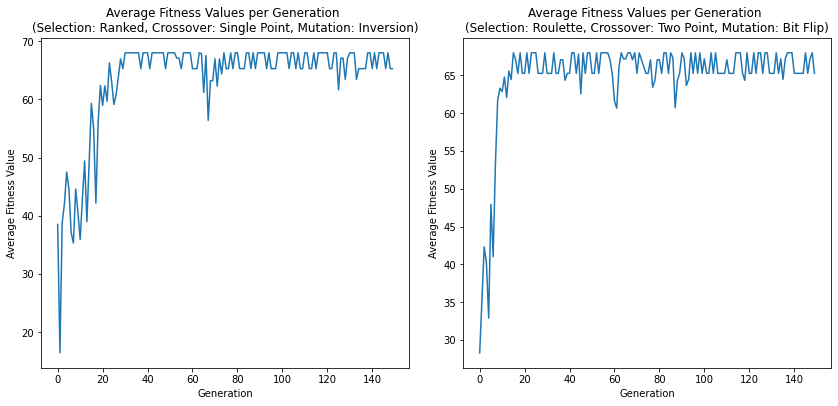

In [43]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Best holiday set (Selection Method: Ranked wheel, Crossover Method: Single Point, Mutation Method: Inversion)
x1 = range(len(avg_fitness_history_1))
y1 = avg_fitness_history_1

ax1.plot(x1, y1)
ax1.set_title("Average Fitness Values per Generation \n(Selection: Ranked, Crossover: Single Point, Mutation: Inversion)")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Average Fitness Value")

# Plot for Best holiday set (Selection Method: Roulette wheel, Crossover Method: Two Point, Mutation Method: Bit Flip)
x2 = range(len(avg_fitness_history_2))
y2 = avg_fitness_history_2

ax2.plot(x2, y2)
ax2.set_title("Average Fitness Values per Generation \n(Selection: Roulette, Crossover: Two Point, Mutation: Bit Flip)")
ax2.set_xlabel("Generation")
ax2.set_ylabel("Average Fitness Value")

plt.tight_layout(pad=2.0)  # Add more padding between subplots

plt.show()


## Summary


# Question 2



The head of village ABC plans to hold a dodol feast for four consecutive days and have 
this feast recorded live in FB as part of promoting the village to outsiders. At the end of 
the dodol feast, the dodol will be shared with villagers and visitors to village ABC. The 
process of making the dodol, a sweet delicacy, is tedious and it requires a lot of strength 
to continuously stir the big pot of dodol to avoid it from being burnt. 

The villagers have been divided into seven teams to stir a pot of dodol on a rotation 
basis for the next four days. The pot of dodol will be stirred by one team at one time. 
Each team will stir the pot of dodol for four hours before another team takes over the 
task of stirring the pot of dodol. Ideally, no team will stir the pot of dodol for more than 
4 hours a day so that each team gets sufficient rest before their next turn to stir the pot 
of dodol. Each team will stir the pot of dodol for at least 8 hours during the entire dodol 
feast.

Formulate the problem as Constraint Satisfaction Problem

## Variable declaration

In [ ]:
# Define the teams, days, and slots
slots = [1, 2, 3, 4, 5, 6]
teams = [1, 2, 3, 4, 5, 6, 7]
days = [1, 2, 3, 4]
solution_limit = 100  # Number of solutions to print
teams_labels = ["Team 1", "Team 2", "Team 3", "Team 4", "Team 5", "Team 6", "Team 7"]

## Solve Dodol Function

In [ ]:
def solve_dodol_feast(minimum_slot):
     # Create the CP-SAT model
    model = cp_model.CpModel()

    # Create the decision variables
    variables = {}
    for day in days:
        for slot in slots:
            for team in teams:
                variables[(day, slot, team)] = model.NewBoolVar(f'time_{team}_{day}_{slot}')

    # Constraint 1: Each team must stir the pot for at least 3 times during the feast
    for team in teams:
        model.Add(sum(variables[(day, slot, team)] for day in days for slot in slots) >= minimum_slot)

    # Constraint 2: No team should stir the pot for more than 4 hours a day
    for day in days:
        for team in teams:
            model.Add(sum(variables[(day, slot, team)] for slot in slots) <= 1) #Sum of the slots each team is working daily should be less than or equal to 1

    # Constraint 3: No team should stir the pot consecutively
    for day in days:
        for slot in slots[1:]:
            for team in teams:
                model.Add(variables[(day, slot, team)] <= sum(variables[(day, slot - 1, t)] for t in teams if t != team)) #indexing over the values to make sure the sum of the previous slot is not equal to the current slot

    # Constraint 4: Only one team should stir the pot in each time slot
    for day in days:
        for slot in slots:
            model.Add(sum(variables[(day, slot, team)] for team in teams) == 1) #Sum of the teams working in each slot should be equal to 1

    # Create the objective variable
    objective_var = model.NewIntVar(0, len(days) * len(slots) * len(teams), 'objective') #Objective variable is the total number of team assignments

    # Constraint 5: Minimize the total number of team assignments
    model.Add(objective_var == sum(variables[(day, slot, team)] for day in days for slot in slots for team in teams)) #Sum of the team assignments should be equal to the objective variable

    # Set the objective function
    model.Minimize(objective_var) #Use the Minimize built-in function to minimize the objective variable to achieve the minimum number of team assignments

    # Create the solver
    solver = cp_model.CpSolver()
    solver.parameters.log_search_progress = True
    solutions_found = 0
    all_solutions = []

    while solutions_found < solution_limit: 
        status = solver.Solve(model)

        # Check if a solution is found
        if status != cp_model.OPTIMAL:
            print("No feasible solution found.")
            break

        # Extract the solution
        solution = {}
        for day in days:
            for slot in slots:
                for team in teams:
                    if solver.BooleanValue(variables[(day, slot, team)]):
                        solution[(day, slot)] = team

        all_solutions.append(solution)
        solutions_found += 1

        # Add a new constraint to prevent finding the same solution again
        model.Add(sum(variables[(day, slot, team)] for day in days for slot in slots for team in teams
                      if solution.get((day, slot)) == team) <= len(solution) - 1)

    return all_solutions

## Main Functions

In [ ]:
# Solve the dodol feast problem and get all possible schedules
all_solutions_1 = solve_dodol_feast(2)

if all_solutions_1:
    solution_idx = 0  # Index of the solution to print (99 for the first solution)
    solution = all_solutions_1[solution_idx]
    print(f"Sample Schedule:")
    table = []
    for day in days:
        row = [f"Day {day}"]
        for slot in slots:
            team = solution.get((day, slot), "-")
            row.append(f"Team {team}")
        table.append(row)
    headers = [""] + [f"Time Slot {slot}" for slot in slots]
    print(tabulate(table, headers=headers, showindex=False, tablefmt="grid"))
    print()
else:
    print("No feasible solution found.")


In [ ]:
# Solve the dodol feast problem and get all possible schedules
all_solutions_2 = solve_dodol_feast(3)

if all_solutions_2:
    solution_idx = 0  # Index of the solution to print (0 for the first solution)
    solution = all_solutions_2[solution_idx]
    print(f" Sample Schedule:")
    table = []
    for day in days:
        row = [f"Day {day}"]
        for slot in slots:
            team = solution.get((day, slot), "-")
            row.append(f"Team {team}")
        table.append(row)
    headers = [""] + [f"Time Slot {slot}" for slot in slots]
    print(tabulate(table, headers=headers, showindex=False, tablefmt="grid"))
    print()
else:
    print("No feasible solution found.")


## Visualise to show the constrast

In [ ]:
# Calculate the average number of slots worked for each team (First Solution)
team_slots_1 = {team: 0 for team in teams}
for solution in all_solutions_1:
    for team in teams:
        team_slots_1[team] += sum(1 for day in days for slot in slots if solution.get((day, slot)) == team)

average_slots_1 = {team: slots / len(all_solutions_1) for team, slots in team_slots_1.items()}

# Calculate the average number of slots worked for each team (Second Solution)
team_slots_2 = {team: 0 for team in teams}
for solution in all_solutions_2:
    for team in teams:
        team_slots_2[team] += sum(1 for day in days for slot in slots if solution.get((day, slot)) == team)

average_slots_2 = {team: slots / len(all_solutions_2) for team, slots in team_slots_2.items()}

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first solution
axes[0].bar(teams_labels, [average_slots_1[team] for team in teams])
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Average Slots Worked')
axes[0].set_title('Average Number of Slots Worked for Each Team (First Solution)')

# Plot the second solution
axes[1].bar(teams_labels, [average_slots_2[team] for team in teams])
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Average Slots Worked')
axes[1].set_title('Average Number of Slots Worked for Each Team (Second Solution)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Ranking Criteria: Inclusion

In a scheduling problem, such as this one, one very important criteria to measure how well a solution is constructed is inclusvity. Where The solution is deemed a higher quality solution, if all teams are equally participating, with minimal time difference.

## Conventional Method, with unoptimized paremeters
1- By following the problem description word to word, we added the each team at least should participate for 8 hours throughout the entire feast. This as demonstrated in Figure 1, Created an unequal work distribution 



## Summary

# Question 3


As an expert in data analytics, you are hired to analyse sports data. Given the NBA 
datasets, build TWO classification and ONE cluster analysis programs in Python.

You are allowed to add ONE additional and relevant data as supplementary data to assist 
you to do further analysis but the given datasets will serve as main dataset for analysis.

## Part 1: Data Cleaning

## Player List Dataset

### Import dataset

In [ ]:
# Load data
playerlist = pd.read_csv("Question-3-Dataset/NBA-playerlist.csv")
playerlist 

In [ ]:
# Drop unnecessary columns
playerlist = playerlist.drop(['Unnamed: 0', 'DISPLAY_LAST_COMMA_FIRST'], axis=1)
playerlist = playerlist.rename(columns={'DISPLAY_FIRST_LAST': 'PLAYER_NAME'})

# Rearrange the columns
person_id_col = playerlist.pop('PERSON_ID')  # Remove 'PERSON_ID' column from DataFrame
playerlist.insert(0, 'PERSON_ID', person_id_col)  # Insert 'PERSON_ID' column at the front

# Display data
playerlist

In [ ]:
# Check data types
playerlist.dtypes

### Handle duplicates and missing values

In [ ]:
def check_duplicates(data):
    duplicate_rows = data[data.duplicated()]
    print("Duplicate Rows:", len(duplicate_rows))
    
    if len(duplicate_rows) > 0:
        data.drop_duplicates(inplace=True)
        print("Duplicate rows dropped.")
        
def check_missing_values(data):
    has_missing_values = False  # Flag variable

    for column in data.columns:
        null_val = data[column].isna().sum()
        total_data = len(data[column])

        if null_val > 0:
            print(column, ":", null_val, "out of", total_data)
            has_missing_values = True  # Set the flag to True if missing values are found

    # Print "No missing values" if no missing values were found
    if not has_missing_values:
        print("No missing values.")

In [ ]:
# Check duplicte data
check_duplicates(playerlist)
print()

# Check missing value
print("Missing values =======================")
check_missing_values(playerlist)

# Check TEAM_ID with 0 as value:
total_null = len(playerlist[playerlist['TEAM_ID'] == 0])
total_data = len(playerlist['TEAM_ID'])
print('TEAM_ID : ', total_null, "out of", total_data)

# Replace TEAM_ID with 0 as value to "-"
playerlist['TEAM_ID'] = playerlist['TEAM_ID'].replace(0, '-')

### Explaination for team abbreviation, city, code, ID and name being null

Roster status 0 means the player is not active, therefore there no team data recorded<br>
Roster status 1 means the player is active, therefore there team data recorded<b>

In [ ]:
# Check if columns are null when ROSTERSTATUS is 0
null_values_roster_0 = playerlist.loc[playerlist['ROSTERSTATUS'] == 0, ['TEAM_ABBREVIATION', 'TEAM_CITY', 'TEAM_CODE', 'TEAM_NAME']].isnull().sum()
print("Null values when ROSTERSTATUS is 0:")
print(null_values_roster_0)
print()

# Check if columns have values when ROSTERSTATUS is 1
not_null_values_roster_1 = playerlist.loc[playerlist['ROSTERSTATUS'] == 1, ['TEAM_ABBREVIATION', 'TEAM_CITY', 'TEAM_CODE', 'TEAM_NAME']].notnull().sum()
print("Non-null values when ROSTERSTATUS is 1:")
print(not_null_values_roster_1)

# Fill NaN value with "-"
columns_to_fill = ['TEAM_ABBREVIATION', 'TEAM_CITY', 'TEAM_CODE', 'TEAM_NAME']
playerlist[columns_to_fill] = playerlist[columns_to_fill].fillna('-')
playerlist

### Explaination for missing playercode

In [ ]:
playerlist['PLAYERCODE'] = playerlist['PLAYERCODE'].fillna("-")

In [ ]:
# Check inconsistency
for column in playerlist.columns:
    val_count = playerlist[column].value_counts()
    print("value count for ", column, ":")
    print(val_count)
    print()

Based on the observation:
- TEAM_CITY has both LA and Los Angeles

In [ ]:
# Replace "LA" with "Los Angeles"
playerlist['TEAM_CITY'] = playerlist['TEAM_CITY'].replace('LA', 'Los Angeles')

# Count the occurrences of each team name again
team_counts = playerlist['TEAM_CITY'].value_counts()

# Print the updated team counts
print(team_counts)

### Finalise cleaned data

In [ ]:
check_missing_values(playerlist)

In [ ]:
playerlist.to_csv('playerlist_cleaned.csv', index=False)

## NBA Season Dataset

### Import dataset

In [ ]:
NBA1 = pd.read_csv("Question-3-Dataset/NBA-Season-2016-2017.csv")
NBA2 = pd.read_csv("Question-3-Dataset/NBA-Season-2017-2018.csv")
NBA3 = pd.read_csv("Question-3-Dataset/NBA-Season-2018-2020.csv")

pd.set_option('display.max_columns', None)

In [ ]:
NBA1

In [ ]:
NBA2

In [ ]:
NBA3

In [ ]:
# Drop unnecessary columns
NBA1 = NBA1.drop('Unnamed: 0', axis=1)
NBA2 = NBA2.drop('Unnamed: 0', axis=1)
NBA3 = NBA3.drop('Unnamed: 0', axis=1)

# Add a 'SEASON' column
NBA1['SEASON'] = '2016-2017'
NBA2['SEASON'] = '2017-2018'
NBA3['SEASON'] = '2018-2020'

# Merge data into one dataframe
NBA_data = pd.concat([NBA1, NBA2, NBA3], axis=0)

# Rearrange the column
game_id_col = NBA_data.pop('GAME_ID')  # Remove 'PERSON_ID' column from DataFrame
NBA_data.insert(0, 'GAME_ID', game_id_col)  # Insert 'PERSON_ID' column at the front

# Display data
NBA_data

In [ ]:
NBA_data.dtypes

In [ ]:
# Convert datatypes
columns_to_convert = ['PLAYER1_ID','PLAYER1_TEAM_ID', 
                      'PLAYER2_ID', 'PLAYER2_TEAM_ID', 
                      'PLAYER3_ID', 'PLAYER3_TEAM_ID',
                      'PERIOD','PERSON1TYPE','PERSON2TYPE', 'PERSON3TYPE']

# Fill NaN with 0, then convert float to int, then to string
NBA_data[columns_to_convert] = NBA_data[columns_to_convert].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int).astype(str)
NBA_data['GAME_ID'] = NBA_data['GAME_ID'].astype(str)

# Fill 0 back into NaN, which will handle later on
NBA_data[columns_to_convert] = NBA_data[columns_to_convert].replace("0", np.nan)

# Display datatype
print(NBA_data.dtypes)

# Display data
NBA_data

### Handle duplicates and missing values

In [ ]:
# Check duplicates
check_duplicates(NBA_data)

print("Missing values =====================")

check_missing_values(NBA_data)

- SCORE AND SCOREMARGIN

In [ ]:
# Fill NaN value with "0-0", since theres no score was made during the event
NBA_data['SCORE'] = NBA_data['SCORE'].fillna('0 - 0')

# If score is "0-0", then score margin is 0
NBA_data.loc[NBA_data['SCORE'] == '0 - 0', 'SCOREMARGIN'] = 0
NBA_data[['GAME_ID', 'SCORE', 'SCOREMARGIN']]

- OTHERS

In [ ]:
# Convert datatypes
columns_to_convert = ['PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'VISITORDESCRIPTION', 'HOMEDESCRIPTION']

# Fill NaN with "-", since we can't simply replace it with other value
NBA_data[columns_to_convert] = NBA_data[columns_to_convert].fillna("-")

# Apply forward fill bcs the EVENTTYPE is during period end, so the WCTime probably follow the previous event
NBA_data['WCTIMESTRING'] = NBA_data['WCTIMESTRING'].ffill()
NBA_data['PERIOD'] = NBA_data['PERIOD'].ffill()

# Drop the this column bcs there only NaN value for every row
NBA_data = NBA_data.drop('NEUTRALDESCRIPTION', axis=1)
NBA_data

In [ ]:
EVENTMSGTYPE_mapping = {
    1: 'FIELD_GOAL_MADE',
    2: 'FIELD_GOAL_MISSED',
    3: 'FREE_THROW_ATTEMPT',
    4: 'REBOUND',
    5: 'TURNOVER',
    6: 'FOUL',
    7: 'VIOLATION',
    8: 'SUBSTITUTION',
    9: 'TIMEOUT',
    10: 'JUMP_BALL',
    11: 'EJECTION',
    12: 'PERIOD_BEGIN',
    13: 'PERIOD_END'
}

EVENTMSGACTIONTYPE_mapping = {
    1: '3PT_JUMP_SHOT',
    79: '3PT_PULLUP_JUMP_SHOT',
    80: '3PT_STEP_BACK_JUMP_SHOT',
    52: 'ALLEY_OOP_DUNK',
    108: 'CUTTING_DUNK_SHOT',
    99: 'CUTTING_FINGER_ROLL_LAYUP_SHOT',
    98: 'CUTTING_LAYUP_SHOT',
    75: 'DRIVING_FINGER_ROLL_LAYUP',
    6: 'DRIVING_LAYUP',
    73: 'DRIVING_REVERSE_LAYUP',
    7: 'DUNK',
    71: 'FINGER_ROLL_LAYUP',
    78: 'FLOATING_JUMP_SHOT',
    3: 'HOOK_SHOT',
    66: 'JUMP_BANK_SHOT',
    5: 'LAYUP',
    79: 'PULLUP_JUMP_SHOT',
    72: 'PUTBACK_LAYUP',
    44: 'REVERSE_LAYUP',
    50: 'RUNNING_DUNK',
    76: 'RUNNING_FINGER_ROLL_LAYUP',
    41: 'RUNNING_LAYUP',
    80: 'STEP_BACK_JUMP_SHOT',
    97: 'TIP_LAYUP_SHOT',
    86: 'TURNAROUND_FADEAWAY',
    58: 'TURNAROUND_HOOK_SHOT',
    47: 'TURNAROUND_JUMP_SHOT'
}

NBA_data['EVENTMSGTYPE_DESCRIPTION'] = NBA_data['EVENTMSGTYPE'].map(EVENTMSGTYPE_mapping).fillna('-')
NBA_data['EVENTMSGACTIONTYPE_DESCRIPTION'] = NBA_data['EVENTMSGACTIONTYPE'].map(EVENTMSGACTIONTYPE_mapping).fillna('-')

# Rearrange the column
NBA_data = NBA_data.reindex(columns=['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGTYPE_DESCRIPTION', 'EVENTMSGACTIONTYPE', 'EVENTMSGACTIONTYPE_DESCRIPTION', 
                                     'HOMEDESCRIPTION', 'PCTIMESTRING', 'PERIOD', 'PERSON1TYPE',
                                       'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID', 'PLAYER1_NAME',
                                       'PLAYER1_TEAM_ID', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID',
                                       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'SCORE', 'SCOREMARGIN',
                                       'VISITORDESCRIPTION', 'WCTIMESTRING', 'SEASON'])
NBA_data

### Finalized cleaned data

In [ ]:
check_missing_values(NBA_data)

In [ ]:
NBA_data.to_csv('nba_cleaned.csv', index=False)

## Part 2: Classification

## Classification Problem 1:
#### Based on PERSON_ID, FROM_YEAR, GAMES_PLAYED_FLAG, OTHERLEAGUE_EXPERIENCE_CH and TO_YEAR columns, predict whether the player's ROSTERSTATUS is Active(1) or Inactive(0)

### Prepare dataset

In [ ]:
# Use Playerlist dataset
playerlist_data = playerlist

In [ ]:
# Drop unnecessary columns
drop_list = ['PLAYERCODE', 'PLAYER_NAME', 'ROSTERSTATUS', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'TEAM_CODE', 'TEAM_ID', 'TEAM_NAME']
playerlist_data_final = playerlist_data.drop(playerlist_data[drop_list], axis=1)

playerlist_data_final.head()

### Label Encoding

In [ ]:
# Apply Label Encoding to convert to numerical data

# Extract columns with object datatype
col_list = playerlist_data_final.select_dtypes(include=["object","bool"]).columns.to_list()

# Initialize a LabelEncoder for each object column
encoders = {}
for col in col_list:
    encoders[col] = LabelEncoder()
    
# Encode the object columns in the DataFrame
for col in col_list:
    playerlist_data_final[col] = encoders[col].fit_transform(playerlist_data_final[col])

playerlist_data_final.head()

### Final check all column datatypes

In [ ]:
# Make sure all columns are numerical
playerlist_data_final.dtypes

## Model 1: Naive Bayes

In [ ]:
# Use Naive Bayes classifier to predict ROSTERSTATUS

# Train test split
X = playerlist_data_final
y = playerlist_data['ROSTERSTATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construct the NB model
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train, y_train) 

# Predict y based on X test set
y_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

# Print model results
nb_result = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Results': [nb_accuracy, nb_precision, nb_recall, nb_f1]})
nb_result.set_index('Metrics', inplace=True)

nb_result

### Compare actual and predicted values

In [ ]:
# Plot a Grouped Bar Chart to compare between actual and predicted values
actual_value_count = y_test.value_counts() 
y_pred_df = pd.DataFrame({'y_pred': y_pred})
pred_value_count = y_pred_df.value_counts() 

x_labels = ['True', 'False']
y_values_1 = [actual_value_count[1], actual_value_count[0]]  # Values for the first group
y_values_2 = [pred_value_count[1], pred_value_count[0]]  # Values for the second group

bar_width = 0.35

x_pos = np.arange(len(x_labels))

plt.bar(x_pos, y_values_1, width=bar_width, label='Actual values')
plt.bar(x_pos + bar_width, y_values_2, width=bar_width, label='Predicted values')

plt.xticks(x_pos + bar_width / 2, x_labels)

plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Naive Bayes: Actual vs Predicted comparison')

plt.legend()
plt.show()

## Model 2: Support Vector Machine (SVM)

In [ ]:
# Use SVM classifier to predict ROSTERSTATUS

# Train test split
X = playerlist_data_final
y = playerlist_data['ROSTERSTATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construct the NB model
svm_clf = svm.SVC(kernel='rbf', gamma='auto') 

# Train the model using the training sets
svm_clf.fit(X_train, y_train) 

# Predict y based on X test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

# Print model results
svm_result = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Results': [svm_accuracy, svm_precision, svm_recall, svm_f1]})
svm_result.set_index('Metrics', inplace=True)

svm_result

### Compare actual and predicted values

In [ ]:
# Plot a Grouped Bar Chart to compare between actual and predicted values
actual_value_count = y_test.value_counts() 
y_pred_df = pd.DataFrame({'y_pred': y_pred})
pred_value_count = y_pred_df.value_counts() 

x_labels = ['True', 'False']
y_values_1 = [actual_value_count[1], actual_value_count[0]]  # Values for the first group
y_values_2 = [pred_value_count[1], pred_value_count[0]]  # Values for the second group

bar_width = 0.35

x_pos = np.arange(len(x_labels))

plt.bar(x_pos, y_values_1, width=bar_width, label='Actual values')
plt.bar(x_pos + bar_width, y_values_2, width=bar_width, label='Predicted values')

plt.xticks(x_pos + bar_width / 2, x_labels)

plt.xlabel('Values')
plt.ylabel('Count')
plt.title('SVM: Actual vs Predicted comparison')

plt.legend()
plt.show()

## Classification Problem 2:
#### Predict the possibility of EVENTMSGTYPE based on the NBA data

### Prepare dataset

In [ ]:
# Use NBA Season dataset
nba_data = NBA_data

In [ ]:
# Drop unnecessary columns
drop_list = ['EVENTMSGTYPE', 'EVENTMSGTYPE_DESCRIPTION', 'EVENTMSGACTIONTYPE_DESCRIPTION', 'HOMEDESCRIPTION', 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'SCORE', 'VISITORDESCRIPTION']
nba_data_final = nba_data.drop(nba_data[drop_list], axis=1)

nba_data_final.head()

### Convert columns datatype to numerical

In [ ]:
# Convert WCTIMESTRING column datatype
nba_data_final['WCTIMESTRING'] = pd.to_datetime(nba_data_final['WCTIMESTRING'])
nba_data_final['WCTIME_Hour'] = nba_data_final['WCTIMESTRING'].dt.hour
nba_data_final['WCTIME_Minute'] = nba_data_final['WCTIMESTRING'].dt.minute

# Drop original WCTIMESTRING column
nba_data_final = nba_data_final.drop('WCTIMESTRING', axis=1)
nba_data_final.head()

In [ ]:
# Convert PCTIMESTRING column datatype
temp_df = pd.DataFrame(columns=['Minutes', 'Seconds'])
temp_df = nba_data_final['PCTIMESTRING'].str.split(':', expand=True)

# Convert minutes and seconds to numeric values
nba_data_final['PCTIME_Minute'] = temp_df[0].astype(int)
nba_data_final['PCTIME_Second'] = temp_df[1].astype(int)

# Drop original PCTIMESTRING column
nba_data_final = nba_data_final.drop('PCTIMESTRING', axis=1)
nba_data_final.head()

In [ ]:
# Replace "-" with 0
nba_data_final = nba_data_final.replace('-', 0)

# Replace "TIE" value in SCOREMARGIN column
nba_data_final['SCOREMARGIN'] = nba_data_final['SCOREMARGIN'].replace('TIE', 0)

nba_data_final.head()

### Label Encoding

In [ ]:
# Apply Label Encoding to convert to numerical data

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'SEASON' column
nba_data_final['SEASON_ENCODED'] = label_encoder.fit_transform(nba_data_final['SEASON'])

# Drop original SEASON column
nba_data_final = nba_data_final.drop('SEASON', axis=1)
nba_data_final.head()

In [ ]:
# Convert object datatype columns to int datatype
object_columns = nba_data_final.select_dtypes(include='object').columns
nba_data_final[object_columns] = nba_data_final[object_columns].astype(int)
nba_data_final.head()

### Final check all column datatypes

In [ ]:
# Make sure all columns are numerical
nba_data_final.dtypes

## Model 1: Naive Bayes

In [ ]:
# Use Naive Bayes classifier to predict EVENTMSGTYPE

# Train test split
X = nba_data_final
y = nba_data['EVENTMSGTYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construct the NB model
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train, y_train) 

# Predict y based on X test set
y_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='macro')
nb_recall = recall_score(y_test, y_pred, average='macro')
nb_f1 = f1_score(y_test, y_pred, average='macro')

# Print model results
nb_result = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Results': [nb_accuracy, nb_precision, nb_recall, nb_f1]})
nb_result.set_index('Metrics', inplace=True)

nb_result

### Compare actual and predicted values

In [ ]:
# Compare y_test and y_pred values
compare_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Add a new column to check if the values are the same
compare_df['Match'] = compare_df['y_test'] == compare_df['y_pred']

compare_df

In [ ]:
# Print number of Matches
compare_df['Match'].value_counts()

## Model 2: Logistic Regression

In [ ]:
# Use Logistic Regression classifier to predict EVENTMSGTYPE

# Split the data into training and test sets
X = nba_data_final
y = nba_data['EVENTMSGTYPE']
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=2) # 20% test set, 80% training set

# Create the linear regression model
logisticReg = LogisticRegression()

# Train the model on the training data
logisticReg.fit(X_train, y_train)

# Evaluate the model
lg_accuracy = accuracy_score(y_test, y_pred)
lg_precision = precision_score(y_test, y_pred, average='macro')
lg_recall = recall_score(y_test, y_pred, average='macro')
lg_f1 = f1_score(y_test, y_pred, average='macro')

# Print model results
lg_result = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Results': [nb_accuracy, nb_precision, nb_recall, nb_f1]})
lg_result.set_index('Metrics', inplace=True)

lg_result

### Compare actual and predicted values

In [ ]:
# Compare y_test and y_pred values
compare_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Add a new column to check if the values are the same
compare_df['Match'] = compare_df['y_test'] == compare_df['y_pred']

compare_df

In [ ]:
# Print number of Matches
compare_df['Match'].value_counts()

## Part 3: Cluster Analysis

## Clustering Problem:
#### Insert problem here

## Summary